# LGM TASK 2:- Prediction Using Decision Tree 
IRIS DATASET

In [10]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Importing and checking the dataset 

In [23]:
df_Iris=pd.read_csv("Iris.csv")
df_Iris=df_Iris.drop('Id',axis=1) # Removing the ID column
df_Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df_Iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [25]:
df_Iris.shape

(150, 5)

In [26]:
df_Iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [27]:
df_Iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


VISUALIZATION OF DATASET

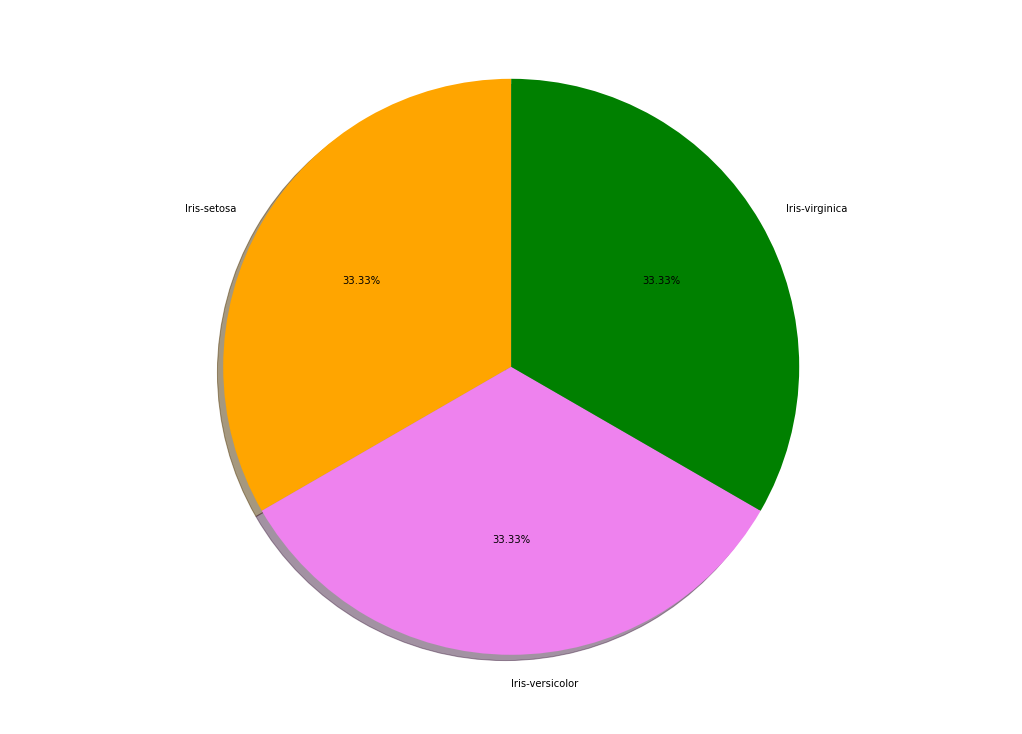

In [13]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['orange','violet','green']
species = df_Iris['Species'].unique()
count = df_Iris['Species'].value_counts().tolist()
ax.pie(count, labels = species, autopct='%1.2f%%', colors=colors, shadow=True, startangle=90)
plt.show()

This shows us that we are having a balanced Dataset

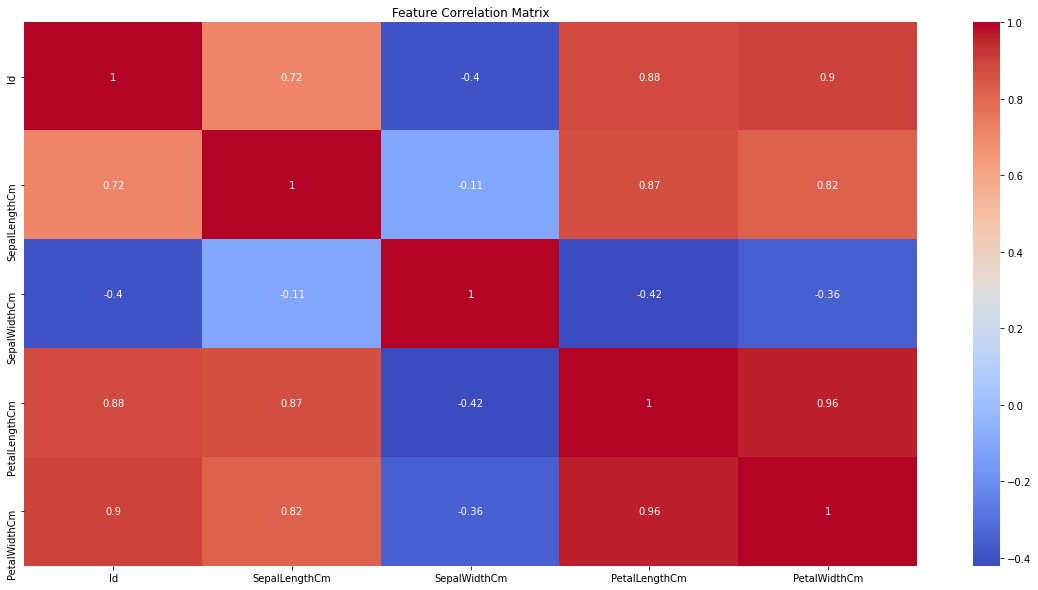

In [14]:
plt.figure(figsize=(20, 10))
corr_mat = df_Iris.corr()
cor_matrix = sn.heatmap(corr_mat, annot=True, cmap="coolwarm")
cor_matrix.set_title("Feature Correlation Matrix")
plt.show()

The heatmap shows that there is high correlation

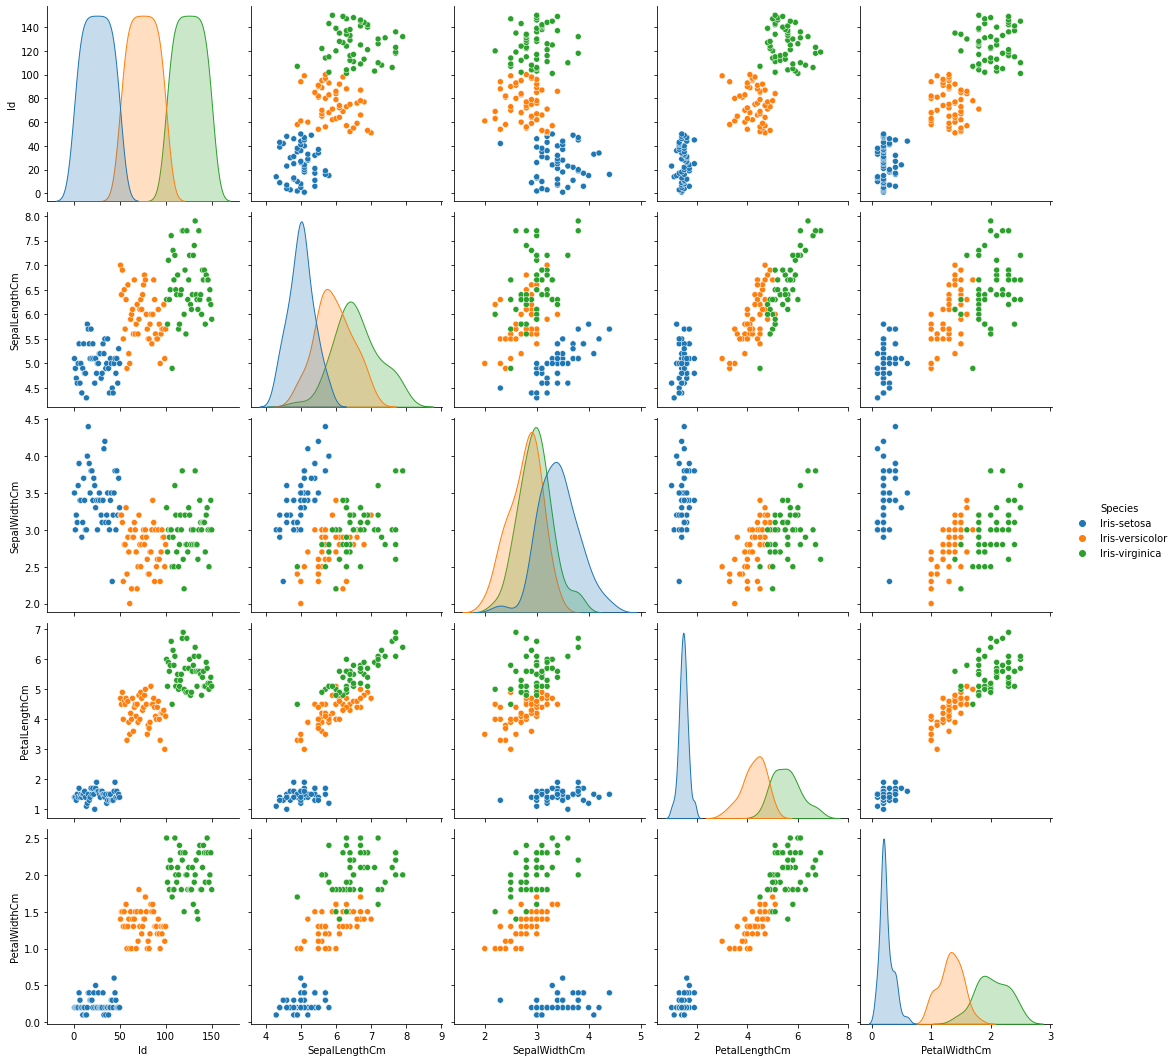

In [18]:
sn.pairplot(df_Iris, hue='Species', height=3)
plt.show()

# Splitting the Dataset into Train and Test Dataset

In [30]:
X = df_Iris.drop(['Species'], 1) # Only to get the properties of species
Y = df_Iris['Species']  # Only to get the corresponding species name

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

In [32]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [33]:
Y_train.head()

60     Iris-versicolor
116     Iris-virginica
144     Iris-virginica
119     Iris-virginica
108     Iris-virginica
Name: Species, dtype: object

Training  And Evaluation Of the Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier_Iris = DecisionTreeClassifier(criterion="entropy", random_state=10)
classifier_Iris.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Y_pred = classifier_Iris.predict(X_test)
accuracy_Iris = accuracy_score(Y_test, Y_pred)
print("Accuracy Of the Decision tree classifier is:",accuracy_Iris)

Accuracy Of the Decision tree classifier is: 0.9777777777777777


In [49]:
print(f"Confusion Matrix",confusion_matrix(Y_test, Y_pred))


Confusion Matrix [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [47]:
print(f"Classification Report: \n\n{classification_report(Y_test, Y_pred)}")

Classification Report: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [53]:
features_iris=df_Iris.columns[:-1]
classes_Of_Iris=df_Iris['Species'].unique().tolist()
features_iris
classes_Of_Iris

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

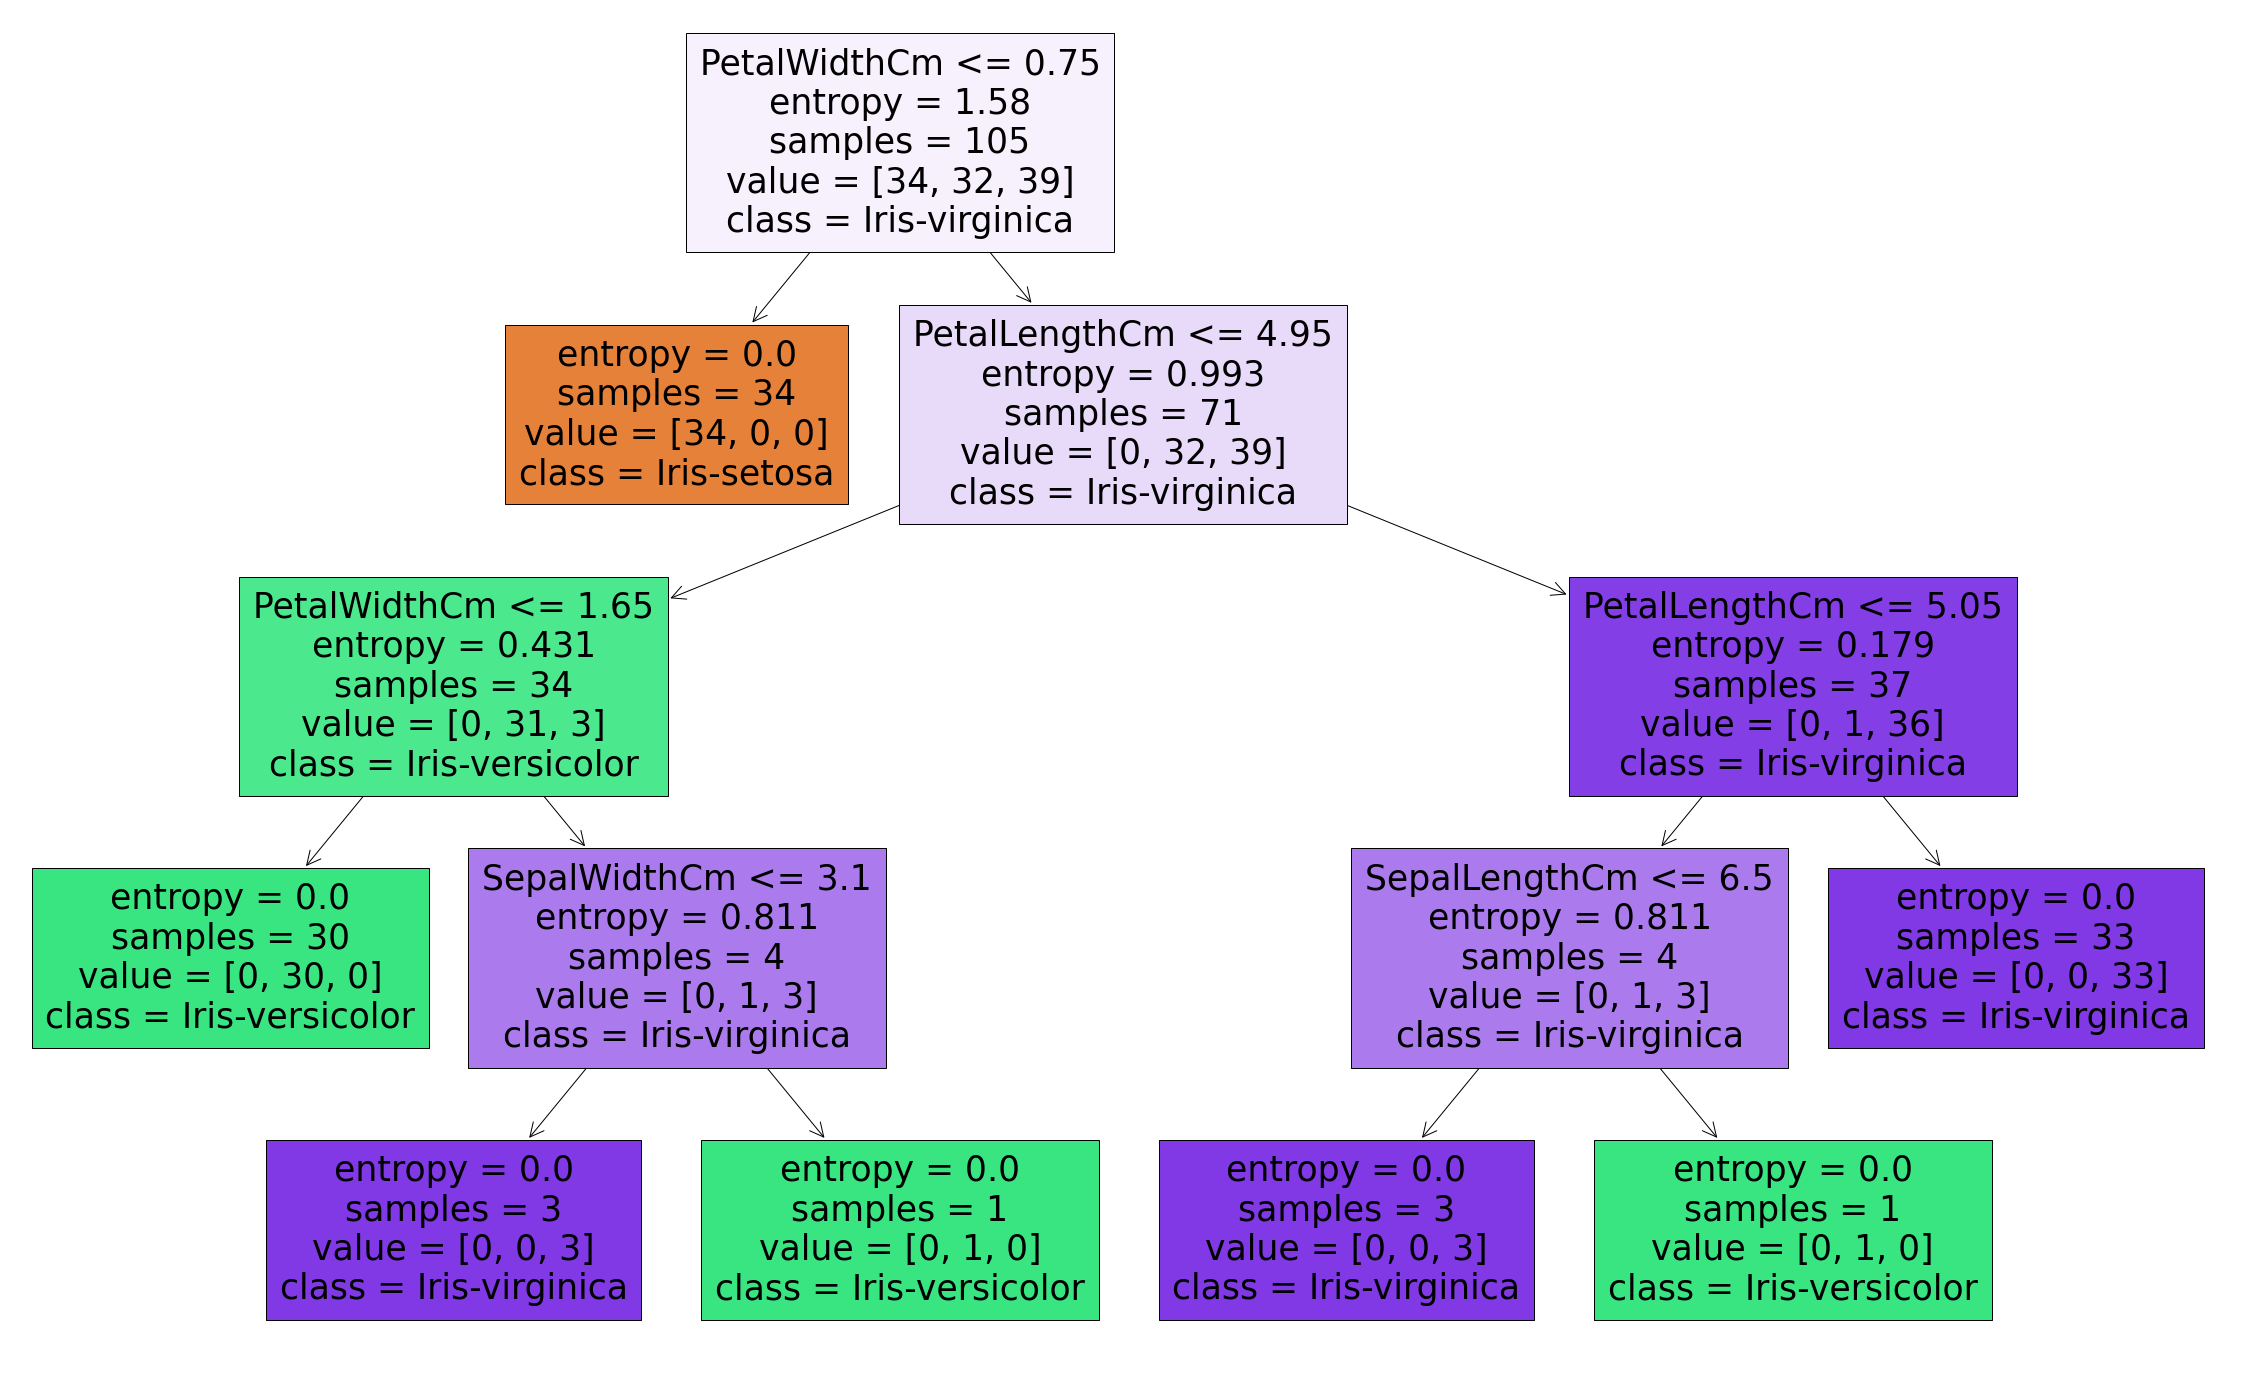

In [61]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 25))
plot_tree(classifier_Iris, feature_names=features_iris, class_names=classes_Of_Iris, filled=True)
plt.show()

# TESTING THE PREDICTION OF THE DECISION TREE BASED 

In [65]:
Testing_prediction_1 = classifier_Iris.predict([[6.5, 4.3, 1.6, 0.3]])
print("The species predicted is :",Testing_prediction_1[0])

The species predicted is : Iris-setosa


In [66]:
Testing_prediction_1 = classifier_Iris.predict([[6.5, 4.5, 4.6, 2.5]])
print("The species predicted is :",Testing_prediction_1[0])

The species predicted is : Iris-versicolor


In [67]:
Testing_prediction_1 = classifier_Iris.predict([[7.1, 7.5, 8.8, 2.5]])
print("The species predicted is :",Testing_prediction_1[0])

The species predicted is : Iris-virginica


Conclusion:- The Testing Done  and found test satisfactory